<h2>Introduction</h2>
(last update: March 21, 2025)

<div>
    This is first notebook in segmentation project series.<br>
    Demonstrate different clustering algorithms.
</div>

In [1]:
#from kaggle.api.kaggle_api_extended import KaggleApi
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
import matplotlib as mpl
import datetime

In [2]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [3]:
from yellowbrick.cluster import KElbowVisualizer

In [4]:
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn import metrics

In [5]:
pd.set_option('future.no_silent_downcasting', True)

<div>
    <h5>Download dataset (first time access)</h5>
    <p>Comment out all lines for kaggle-dataset download, when running notebook next time.</p>
</div>

In [6]:
# create instance of KaggleApi
#api = KaggleApi()
# authentication with api-key
#api.authenticate()
# download the dataset
#api.dataset_download_files('imakash3011/customer-personality-analysis', path='./data/', unzip=True)

In [7]:
#read the tab-separated file
data = pd.read_csv('data/marketing_campaign.csv', sep="\t")

In [8]:
data.head(3)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0


In [9]:
#basic info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [10]:
#list of all categorical column-names
categorical_colnames = data.select_dtypes(include=['object']).columns.tolist()
categorical_colnames

['Education', 'Marital_Status', 'Dt_Customer']

In [11]:
#remove "dt_customer" from the list- those are dates when customers joined
#inplace removal
categorical_colnames.remove('Dt_Customer')

In [12]:
#find all unique values in each column
for colname in categorical_colnames:
    print(f"{data[colname].value_counts()}")
    print()

Education
Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: count, dtype: int64

Marital_Status
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64



In [13]:
#Numerical columns with important data
num_columns = ['Income', 'Kidhome', 'Teenhome','Recency','MntWines','MntFruits','MntMeatProducts', 'MntFishProducts',
              'MntSweetProducts','MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases','NumCatalogPurchases','NumStorePurchases',
              'NumWebVisitsMonth']

In [14]:
#stat-description of these columns
data[num_columns].describe().T

,count,mean,std,min,25%,50%,75%,max
Income,2216.0,52247.251354,25173.076661,1730.0,35303.00,51381.5,68522.00,666666.0
Kidhome,2240.0,0.444196,0.538398,0.0,0.00,0.0,1.00,2.0
Teenhome,2240.0,0.506250,0.544538,0.0,0.00,0.0,1.00,2.0
Recency,2240.0,49.109375,28.962453,0.0,24.00,49.0,74.00,99.0
MntWines,2240.0,303.935714,336.597393,0.0,23.75,173.5,504.25,1493.0
MntFruits,2240.0,26.302232,39.773434,0.0,1.00,8.0,33.00,199.0
MntMeatProducts,2240.0,166.950000,225.715373,0.0,16.00,67.0,232.00,1725.0
MntFishProducts,2240.0,37.525446,54.628979,0.0,3.00,12.0,50.00,259.0
MntSweetProducts,2240.0,27.062946,41.280498,0.0,1.00,8.0,33.00,263.0
MntGoldProds,2240.0,44.021875,52.167439,0.0,9.00,24.0,56.00,362.0


### 2. Data Cleaning:

1. Missing values- Income column has missing values; those handful of rows will be dropped.
2. Incorrect data- Dates are in string format; will be converted to date-time format.
3. Categorical features- they will be encoded in numerical form.

#### 2.1 Missing values

In [15]:
#remove missing values
data = data.dropna()

In [16]:
#check total number of observations left
print(f"total rows in dataframe now: {len(data)}")

total rows in dataframe now: 2216


#### 2.2 Date of Joining column

In [17]:
#check type
type(data.Dt_Customer[1])
#data.loc[:, 'Dt_Customer'].head(3)

str

In [18]:
#convert the column to date-time
data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'], format='%d-%m-%Y')

In [19]:
data['Dt_Customer'].describe()

count                             2216
mean     2013-07-10 11:29:27.509025280
min                2012-07-30 00:00:00
25%                2013-01-16 00:00:00
50%                2013-07-08 12:00:00
75%                2013-12-31 00:00:00
max                2014-06-29 00:00:00
Name: Dt_Customer, dtype: object

In [20]:
dates = []

In [21]:
for i in data['Dt_Customer']:
    #extract only the date part from date-time format of column
    i = i.date()
    dates.append(i)
#Earliest and most recent date in the dataset
print("Newest date of customer enrollment:", max(dates))
print("Oldest date of customer enrollment:", min(dates))

Newest date of customer enrollment: 2014-06-29
Oldest date of customer enrollment: 2012-07-30


Now, I'll create a new feature <b>"Customer_For"</b> out of this <b>"Dt_Customer"</b>, which contains num. of days a customer has been shopping at this store (with respect to the most recent date in the dataset).

In [22]:
#most recent date in database
recent_date = max(dates)

In [23]:
#Creating "Customer_for" features
#customer-for-xxx-number-of-days

#list to store number of days for each customer
days = []
for i in dates:
    #this wont give a date, but a timedelta object.
    num_of_days = recent_date - i
    #add this to the days-list
    days.append(num_of_days)

#demo of what the days list values type
print("Number of days is of type datetime right now: ", days[0:2])

Number of days is of type datetime right now:  [datetime.timedelta(days=663), datetime.timedelta(days=113)]


The "number of days" obtained above are in datetime's timedelta format instead of integer.  
In the following code chunk, <b><code>column-name.dt.days</code></b> extracts the "days" part and <b><code>pd.to_numeric()</code></b> converts it to integer format.

In [24]:
#Add this list days-count to the dataframe
data['Customer_For'] = days
#values are time-delta objects, extract days out from them
data['Customer_For'] = data['Customer_For'].dt.days
#Convert to numeric type
data['Customer_For'] = pd.to_numeric(data['Customer_For'])

In [25]:
data[['ID', 'Dt_Customer', 'Customer_For']].head(3)

,ID,Dt_Customer,Customer_For
0,5524,2012-09-04,663
1,2174,2014-03-08,113
2,4141,2013-08-21,312


#### 2.3 Create New Features

##### A. Age of customers

In [26]:
type(recent_date.year)

int

In [27]:
#age will be calculated from 2014, the most recent date in dataset
age = []
recent_year = recent_date.year
for i in data['Year_Birth']:
    customer_age = recent_year - i
    age.append(customer_age)

In [28]:
#add this list to dataframe
data['customer_age'] = age
print("maximum age", max(data.customer_age))
print("minimum age", min(data.customer_age))

maximum age 121
minimum age 18


Maximum age of 121 seems bizarre.  
Let's have a look at the age-distribution of all customers.  
These discrepancies will be corrected in upcoming sections.

In [29]:
data['customer_age'].describe()

count    2216.000000
mean       45.179603
std        11.985554
min        18.000000
25%        37.000000
50%        44.000000
75%        55.000000
max       121.000000
Name: customer_age, dtype: float64

In [30]:
#finding out the 99th percentile of age
data['customer_age'].quantile(0.99)

np.float64(69.0)

99% of customers in this dataset are below the age of 69.  
There, definitely are some outliers in the dataset.

<h5>b. Total amount spent by each customer in 2 years</h5>

In [31]:
#see names of all columns starting with "Mnt"
data.columns[data.columns.str.startswith('Mnt')]

Index(['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
       'MntSweetProducts', 'MntGoldProds'],
      dtype='object')

In [32]:
#add values of all column starting with "Mnt"
data['total_spent'] = data.loc[:, data.columns.str.startswith('Mnt')].sum(axis=1)

In [33]:
data['total_spent'].describe()

count    2216.000000
mean      607.075361
std       602.900476
min         5.000000
25%        69.000000
50%       396.500000
75%      1048.000000
max      2525.000000
Name: total_spent, dtype: float64

<h5>c. Living situation from marital status of customer</h5>

In [34]:
#all unique values in the marital status column
data['Marital_Status'].value_counts()

Marital_Status
Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64

"Married" and "Together" values will be replaced with "Partner".  
All other values will be replaced with "Alone".  
This is being done to simplify the living-status of customer.

In [35]:
data['living_with'] = data['Marital_Status'].replace({'Married':'Partner', 
                                                         'Together':'Partner',
                                                        'Single':'Alone',
                                                        'Divorced':'Alone',
                                                        'Widow':'Alone',
                                                        'Absurd':'Alone',
                                                        'YOLO':'Alone'}
                                                       )

In [36]:
data['living_with'].value_counts()

living_with
Partner    1430
Alone       786
Name: count, dtype: int64

<h5>d. Total children in house</h5>

In [37]:
data['children'] = data['Kidhome'] + data['Teenhome']

In [38]:
data['children'].value_counts()

children
1    1117
0     633
2     416
3      50
Name: count, dtype: int64

<h5>e. Total members in family</h5>

In [39]:
data['family_size'] = data['living_with'].replace({'Partner':2, 'Alone':1}).infer_objects(copy=False) + data['children']

In [40]:
data['family_size'].value_counts()

family_size
3    880
2    757
4    296
1    252
5     31
Name: count, dtype: int64

<h5>f. Feature indicating parenthoood</h5>

In [41]:
#1 for parenthood, 0 for none
data['parenthood'] = (data['children'] > 0).astype(int)

In [42]:
data[['children', 'parenthood']].head(4)

,children,parenthood
0,0,0
1,2,1
2,0,0
3,1,1


<h5>g. Create only 3 categories for Education level</h5>

In [43]:
data['Education'].value_counts()

Education
Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: count, dtype: int64

In [44]:
data['edu_level'] = data['Education'].replace({'Basic':'Undergraduate', 
                                              '2n Cycle': 'Undergraduate',
                                              'Graduation':'Graduate',
                                              'Master':'Postgraduate',
                                              'PhD':'Postgraduate'})

<h5>h. Rename some columns</h5>

In [45]:
data.columns[data.columns.str.startswith('Mnt')]

Index(['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
       'MntSweetProducts', 'MntGoldProds'],
      dtype='object')

In [46]:
data = data.rename(columns={'MntWines':'Wine', 'MntFruits':'Fruits', 'MntMeatProducts':'Meat',
                   'MntFishProducts':'Fish','MntSweetProducts':'Sweets', 'MntGoldProds':'Gold'})

<h5>i. Drop redundant features</h5>

In [47]:
data.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'Wine', 'Fruits', 'Meat', 'Fish',
       'Sweets', 'Gold', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Customer_For', 'customer_age', 'total_spent', 'living_with',
       'children', 'family_size', 'parenthood', 'edu_level'],
      dtype='object')

In [48]:
cols_to_drop = ['Year_Birth', 'Marital_Status', 'Dt_Customer', 'Z_CostContact','Z_Revenue', 'ID', 'Education']
#remove these columns from dataframe
data = data.drop(cols_to_drop, axis=1)

In [49]:
data['Complain'].value_counts()

Complain
0    2195
1      21
Name: count, dtype: int64

<h4>4. Visual Analysis of features</h4>

In [50]:
numerical_cols = ['customer_age', 'Customer_For', 'Income','total_spent', 'Recency']

In [51]:
data[numerical_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
customer_age,2216.0,45.179603,11.985554,18.0,37.0,44.0,55.0,121.0
Customer_For,2216.0,353.521209,202.434667,0.0,180.0,355.5,529.0,699.0
Income,2216.0,52247.251354,25173.076661,1730.0,35303.0,51381.5,68522.0,666666.0
total_spent,2216.0,607.075361,602.900476,5.0,69.0,396.5,1048.0,2525.0
Recency,2216.0,49.012635,28.948352,0.0,24.0,49.0,74.0,99.0


Max value in income and age of customers seems way off from the median and 75th percentile.  
A visual analysis might help detect outliers.

In [52]:
#features to plot
columns_to_plot = ['customer_age', 'Income', 'parenthood']

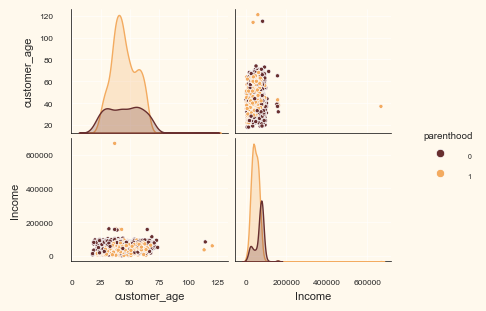

In [53]:
#Setting up colors prefrences
sns.set(rc={"axes.facecolor":"#FFF9ED","figure.facecolor":"#FFF9ED"})

pairplot = sns.pairplot(data[columns_to_plot], hue='parenthood',
             palette= (["#682F2F","#F3AB60"]))

#Reduce figure size
pairplot.fig.set_size_inches(5,3)
#Reduce size of points in scatterplot, border-width of histogram
for ax in pairplot.axes.flatten():
    #reduce the size of x-y axis titles
    ax.set_xlabel(ax.get_xlabel(), fontsize=8)
    ax.set_ylabel(ax.get_ylabel(), fontsize=8)
    #reduce tick size
    ax.tick_params(axis="both", labelsize=6)
    
    for collection in ax.collections:
        collection.set_sizes([9])
    #border-width of histogram
    for patch in ax.patches:
        patch.set_linewidth(0.7)
    #reduce the width of white grid lines in background
    ax.grid(linewidth=0.4)
    #change color of X-Y axis to black
    for spine in ax.spines.values():
        spine.set_edgecolor("black")
        spine.set_linewidth(0.5)

#legend settings
pairplot._legend.get_title().set_fontsize(7)  # Reduce legend title size
for text in pairplot._legend.get_texts():
    text.set_fontsize(5)

#set a dpi value so that figure and font dont appear blurry
#this is enlarging the image a lot..
#pairplot.fig.set_dpi(150)
plt.show()

In [54]:
#Drop rows with outliers

data = data[(data["customer_age"]<90)]

In [55]:
data = data[(data['Income'] < 600000)]

In [56]:
data.shape

(2212, 30)

<h3>3. Data Preprocessing</h3>

In this section, I'll preprocess the features to perform clustering operations.

Following steps will be taken in this section:
<ul>
    <li>Feature encoding of categorical columns.</li>
    <li>Feature scaling using standard-scalar.</li>
    <li>Create subset dataframe for dimensionality reduction.</li>
</ul>

In [57]:
s = (data.dtypes == 'object')

In [58]:
s[s].index

Index(['living_with', 'edu_level'], dtype='object')

In [59]:
#categorical columns
cat_columns = list(s[s].index)
cat_columns

['living_with', 'edu_level']

In [60]:
#instantiate Label-Encoder
le = LabelEncoder()

In [61]:
#dictionary to store values and their encoding for each column
encoders = {}
for col in cat_columns:
    le = LabelEncoder()
    data[f"{col}_coded"] = le.fit_transform(data[col])
    encoders[col] = dict(zip(le.classes_, le.transform(le.classes_)))

In [62]:
#view the numbers associated to each category in each column
for key in encoders:
    print(f"{key}: {encoders[key]}")

living_with: {'Alone': np.int64(0), 'Partner': np.int64(1)}
edu_level: {'Graduate': np.int64(0), 'Postgraduate': np.int64(1), 'Undergraduate': np.int64(2)}


In [63]:
#make a copy of the dataframe
data2 = data.copy()

In [64]:
data2.columns

Index(['Income', 'Kidhome', 'Teenhome', 'Recency', 'Wine', 'Fruits', 'Meat',
       'Fish', 'Sweets', 'Gold', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response', 'Customer_For', 'customer_age',
       'total_spent', 'living_with', 'children', 'family_size', 'parenthood',
       'edu_level', 'living_with_coded', 'edu_level_coded'],
      dtype='object')

In [65]:
#create subset of the dataset by removing promotion/acceptance colummns
accepted_cols = list(data.columns[data.columns.str.contains('Accepted', case=False)])
drop_columns = accepted_cols + ['Complain', 'Response', 'living_with', 'edu_level']
#remove the columns
data_subset = data2.drop(drop_columns, axis=1)

In [66]:
data_subset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2212 entries, 0 to 2239
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Income               2212 non-null   float64
 1   Kidhome              2212 non-null   int64  
 2   Teenhome             2212 non-null   int64  
 3   Recency              2212 non-null   int64  
 4   Wine                 2212 non-null   int64  
 5   Fruits               2212 non-null   int64  
 6   Meat                 2212 non-null   int64  
 7   Fish                 2212 non-null   int64  
 8   Sweets               2212 non-null   int64  
 9   Gold                 2212 non-null   int64  
 10  NumDealsPurchases    2212 non-null   int64  
 11  NumWebPurchases      2212 non-null   int64  
 12  NumCatalogPurchases  2212 non-null   int64  
 13  NumStorePurchases    2212 non-null   int64  
 14  NumWebVisitsMonth    2212 non-null   int64  
 15  Customer_For         2212 non-null   int64 

In [67]:
##Standardize the subset
stan_scaler = StandardScaler()
stan_scaler.fit(data_subset)
scaled_ds = pd.DataFrame(stan_scaler.transform(data_subset), columns=data_subset.columns)
print("All features scaled")

All features scaled


In [68]:
print("Dataframe to be used for future modelling")
scaled_ds.head(4)

Dataframe to be used for future modelling


,Income,Kidhome,Teenhome,Recency,Wine,Fruits,Meat,Fish,Sweets,Gold,...,NumStorePurchases,NumWebVisitsMonth,Customer_For,customer_age,total_spent,children,family_size,parenthood,living_with_coded,edu_level_coded
0,0.287105,-0.822754,-0.929699,0.310353,0.977660,1.552041,1.690293,2.453472,1.483713,0.852576,...,-0.555814,0.692181,1.527721,1.018352,1.676245,-1.264598,-1.758359,-1.581139,-1.349603,-0.893586
1,-0.260882,1.040021,0.908097,-0.380813,-0.872618,-0.637461,-0.718230,-0.651004,-0.634019,-0.733642,...,-1.171160,-0.132545,-1.189011,1.274785,-0.963297,1.404572,0.449070,0.632456,-1.349603,-0.893586
2,0.913196,-0.822754,-0.929699,-0.795514,0.357935,0.570540,-0.178542,1.339513,-0.147184,-0.037254,...,1.290224,-0.544908,-0.206048,0.334530,0.280110,-1.264598,-0.654644,-1.581139,0.740959,-0.893586
3,-1.176114,1.040021,-0.929699,-0.795514,-0.872618,-0.561961,-0.655787,-0.504911,-0.585335,-0.752987,...,-0.555814,0.279818,-1.060584,-1.289547,-0.920135,0.069987,0.449070,0.632456,0.740959,-0.893586


<h4>Check for correlation between features</h4>

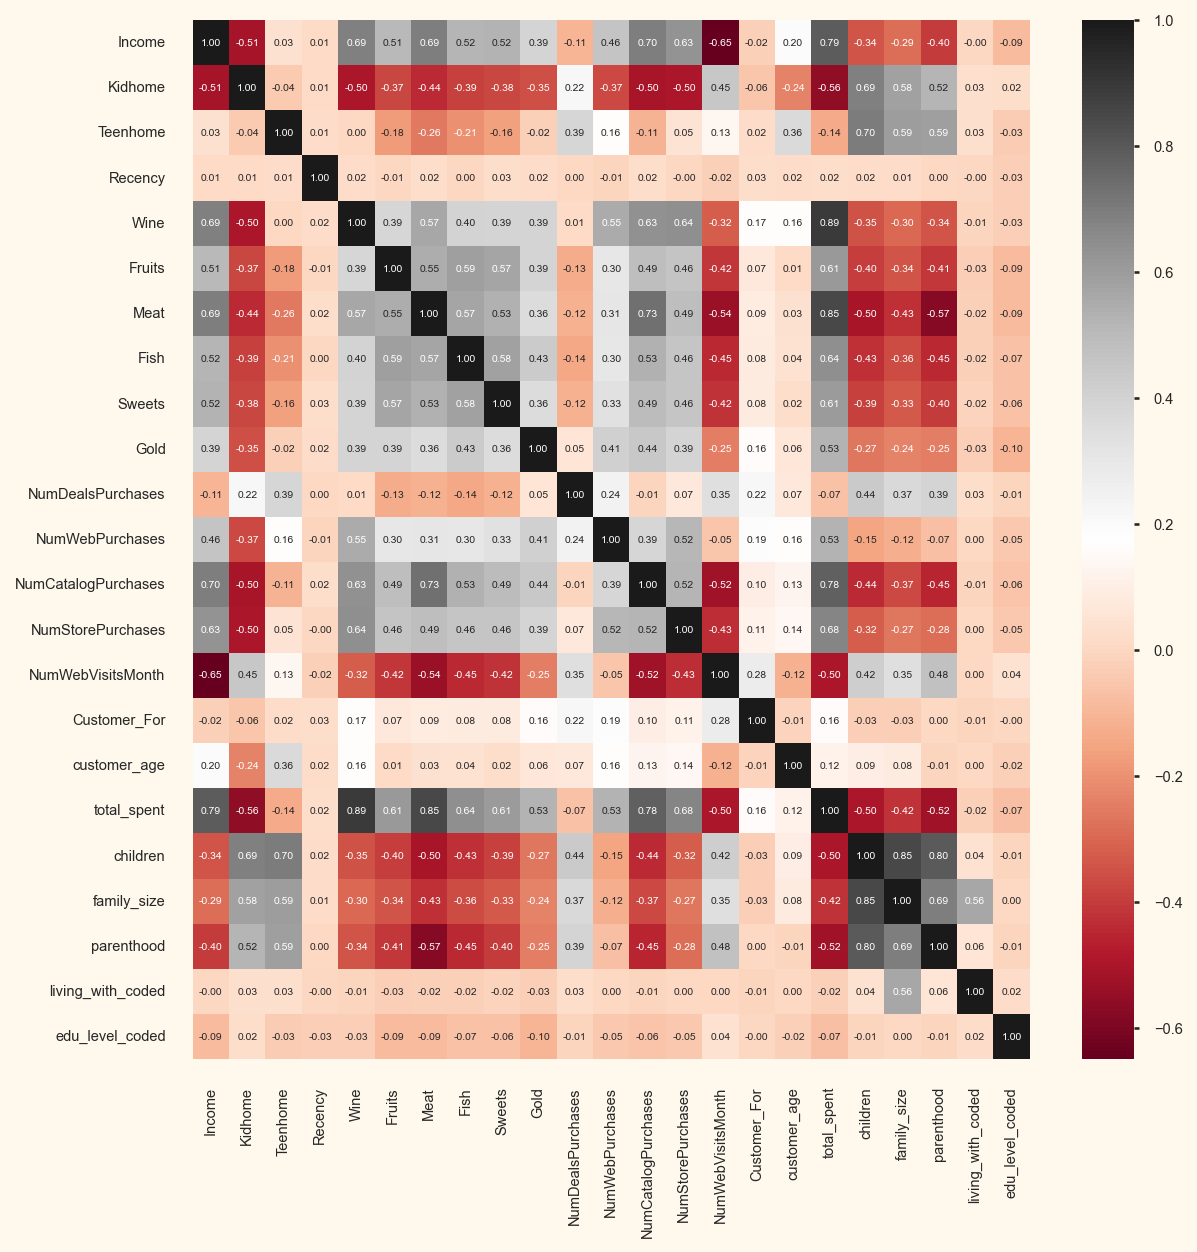

In [69]:
plt.figure(figsize = (9,9))
ax = sns.heatmap(data_subset.corr(), annot=True, cmap='RdGy', fmt='.2f', annot_kws={'size':5})
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=7, size=2.5)
plt.xticks(fontsize=7)
plt.yticks(fontsize=7)
plt.gcf().set_dpi(150)
plt.show()

<h3>Dimensionality Reduction via PCA</h3>

I have to reduce the number of features to 3 using Principal Component analysis.

In [70]:
pca = PCA(n_components = 3)

In [71]:
pca.fit(scaled_ds)

PCA(n_components=3)

In [72]:
PCA_ds = pd.DataFrame(pca.transform(scaled_ds), columns = (['col1', 'col2', 'col3']))

In [73]:
PCA_ds.describe().T

,count,mean,std,min,25%,50%,75%,max
col1,2212.0,-3.212219e-17,2.878602,-5.978124,-2.539470,-0.781595,2.386380,7.452915
col2,2212.0,0.000000e+00,1.709469,-4.194757,-1.323929,-0.173721,1.234851,6.168189
col3,2212.0,3.212219e-18,1.231687,-3.625248,-0.853713,-0.050842,0.863974,6.750458


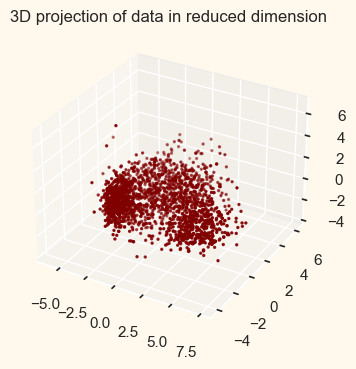

In [74]:
#3D projection of data in reduced dimension
x = PCA_ds['col1']
y = PCA_ds['col2']
z = PCA_ds['col3']
#plot
fig = plt.figure(figsize = (6,4))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, c='maroon', marker='o', s=2)
ax.set_title('3D projection of data in reduced dimension')
plt.show()

<h3>Clustering</h3>

Steps to be performed in clustering:  
1. Elbow method- to determine number of clusters to be formed.
2. Clustering process via Agglomerative Clustering.
3. Analysing clusters formed through scatter plots.

<h4>3.1 Decide on number of clusters</h4>

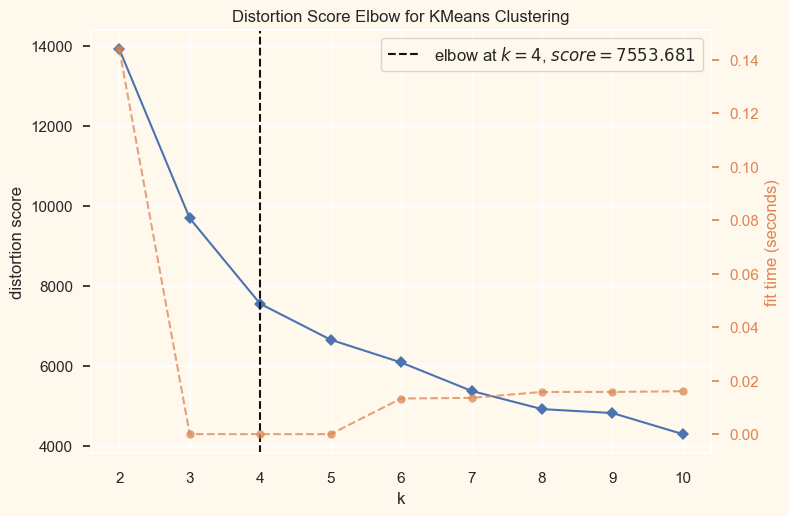

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [75]:
#apply Elbow method
Elbow_M = KElbowVisualizer(KMeans(), n=10)
Elbow_M.fit(PCA_ds)
Elbow_M.show()

Graph above shows that 4 will an optimal number of clusters.  
Below agglomerative clustering has been performed on our data using 4 clusters.

In [76]:
#Initiate the clustering model
clustering_model = AgglomerativeClustering(n_clusters=4)
yhat_ac = clustering_model.fit_predict(PCA_ds)
PCA_ds['clusters'] = yhat_ac
#add this resulting cluster feature to original df
data['clusters'] = yhat_ac
print('cluster-value feature added to original data')

cluster-value feature added to original data


Let's have a look at the 3D look of the data segragated by clusters.

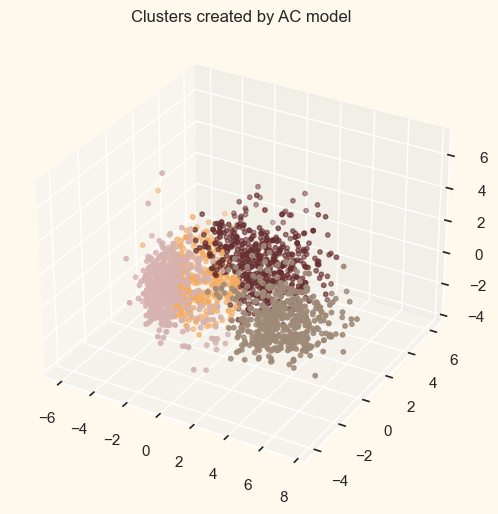

In [81]:
pallet = ["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"]
cmap = colors.ListedColormap(["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"])

fig = plt.figure(figsize = (6,6))
ax = plt.subplot(111, projection="3d")
ax.scatter(x, y, z, c=PCA_ds.clusters, marker = 'o', s=10, cmap=cmap)
ax.set_title('Clusters created by AC model')
plt.show()

<h3>Model Evaluation</h3>

Let's observe the patterns in each cluster and analyse our model using these observations. 

<h5>Total number of data points in each cluster</h5>

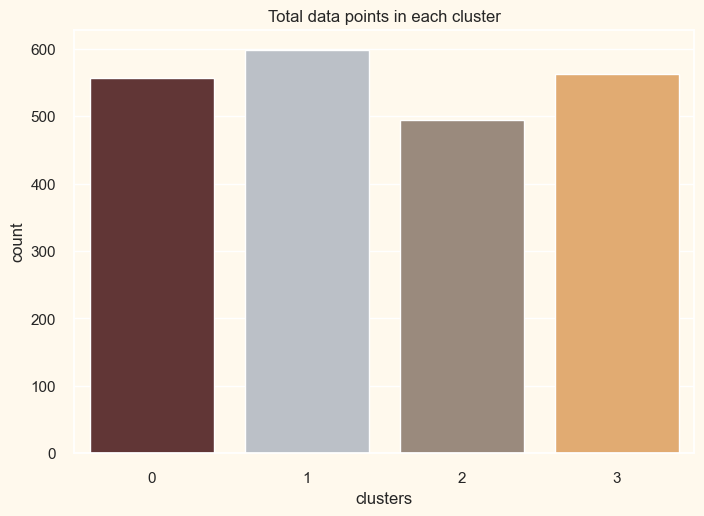

In [83]:
pal = ["#682F2F","#B9C0C9", "#9F8A78","#F3AB60"]
cluster_countplot = sns.countplot(x=data['clusters'], hue=data['clusters'], palette=pal, legend=False)
cluster_countplot.set_title('Total data points in each cluster')
plt.show()

Clusters seem to be fairly distributed.

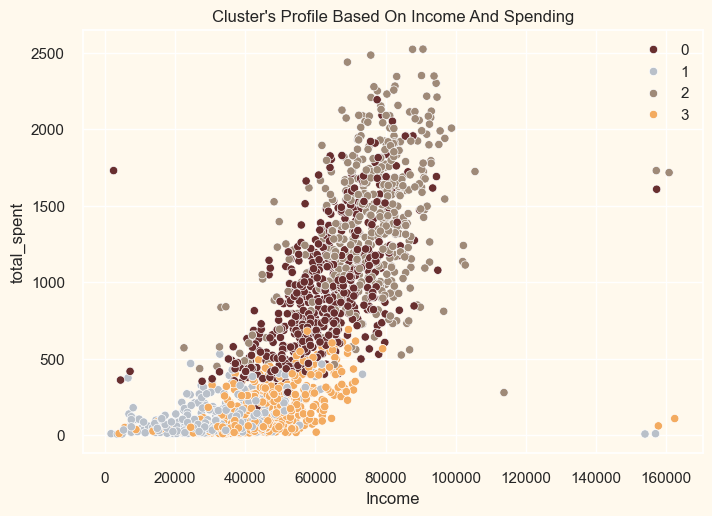

In [84]:
pl = sns.scatterplot(data = data, x=data["Income"], y=data["total_spent"],hue=data["clusters"], palette= pal)
pl.set_title("Cluster's Profile Based On Income And Spending")
plt.legend()
plt.show()

The 4 groups of customers can be described as follows:
<ul>
    <li>Group 0: Average income, high spending.</li>
    <li>Group 1: Low income, low spending.</li>
    <li>Group 2: High income, high spending.</li>
    <li>Group 3: Average income, low spending.</li>
</ul>

Detailed distribution of clusters on the basis of products like wine, fish etc. in the data:

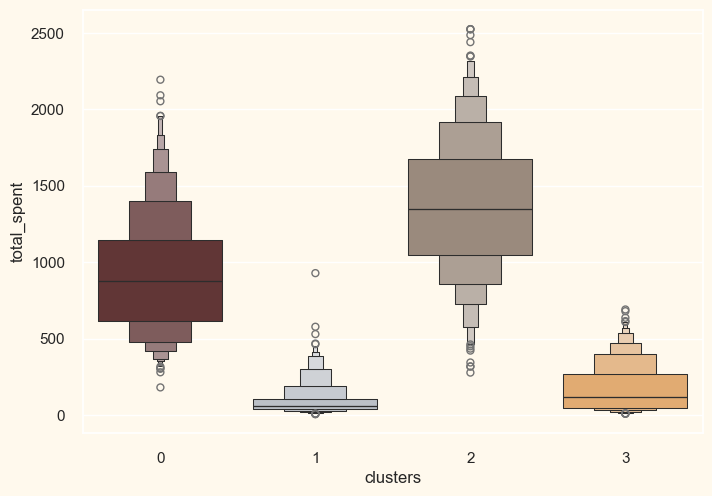

In [85]:
plt.figure()
pl=sns.boxenplot(x=data["clusters"], y=data["total_spent"], palette=pal, hue=data['clusters'], legend=False)
plt.show()

Cluster 0 and Cluster 2 are high spenders.

In [86]:
data.columns

Index(['Income', 'Kidhome', 'Teenhome', 'Recency', 'Wine', 'Fruits', 'Meat',
       'Fish', 'Sweets', 'Gold', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response', 'Customer_For', 'customer_age',
       'total_spent', 'living_with', 'children', 'family_size', 'parenthood',
       'edu_level', 'living_with_coded', 'edu_level_coded', 'clusters'],
      dtype='object')

<h4>Marketting Campaign acceptance by each customer group</h4>

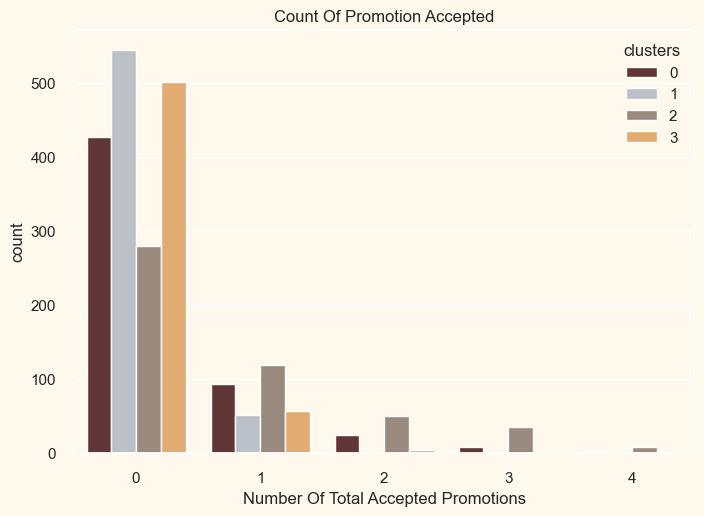

In [88]:
#Creating a feature to get a sum of accepted promotions 
data["Total_Promos"] = data["AcceptedCmp1"]+ data["AcceptedCmp2"]+ data["AcceptedCmp3"]+ data["AcceptedCmp4"]+ data["AcceptedCmp5"]
#Plotting count of total campaign accepted.
plt.figure()
pl = sns.countplot(x=data["Total_Promos"],hue=data["clusters"], palette= pal)
pl.set_title("Count Of Promotion Accepted")
pl.set_xlabel("Number Of Total Accepted Promotions")
plt.show()

Campaigns have not really performed well since majority of customers didnt accept a single campaign.  
And campaigns 2,3 and 4 have not been even accepted by all kinds of customers.

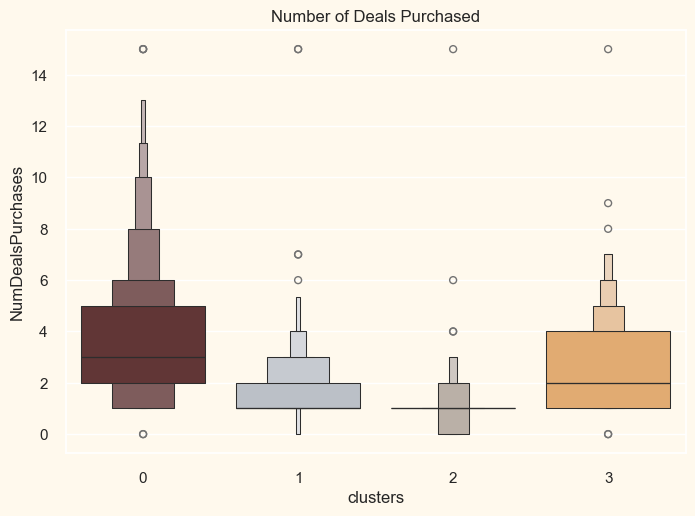

In [93]:
#Plotting the number of deals purchased
plt.figure()
pl=sns.boxenplot(y=data["NumDealsPurchases"],x=data["clusters"], palette= pal, hue=data['clusters'], legend=False
                )
pl.set_title("Number of Deals Purchased")
plt.show()

Unlike the campaigns, deals offered by the brand have performed better.  
Customer group 0 and 3 have accepted more deals while purchasing as compared to others.  
Customer group 2 has spent high amount of money while purchasing but have shown least interest in campaigns or deals.

<h3>Customer Profiling</h3>

The customers were grouped into different clusters, their purchasing patterns were studied.  
Now its time to create profiles for each group based on their personal details present in our data.
This will help in identifying the brand's star customers and also in target marketing for each kind.

In [98]:
data.columns

Index(['Income', 'Kidhome', 'Teenhome', 'Recency', 'Wine', 'Fruits', 'Meat',
       'Fish', 'Sweets', 'Gold', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response', 'Customer_For', 'customer_age',
       'total_spent', 'living_with', 'children', 'family_size', 'parenthood',
       'edu_level', 'living_with_coded', 'edu_level_coded', 'clusters',
       'Total_Promos'],
      dtype='object')

<Figure size 800x550 with 0 Axes>

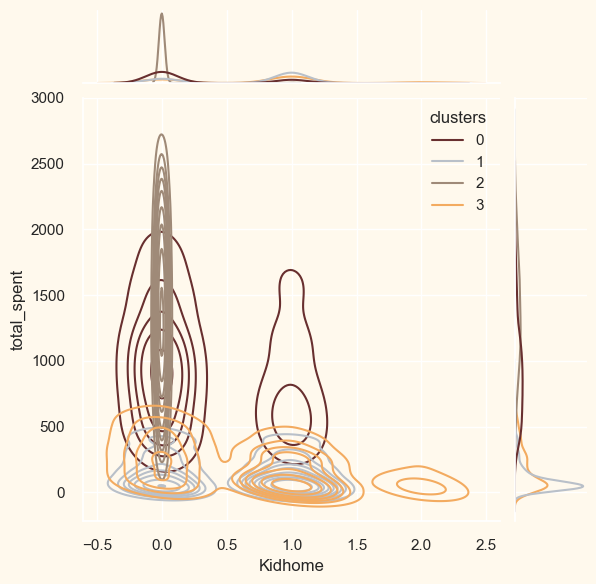

C:\Users\shefa\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:1883: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  func(x=self.x, ax=self.ax_marg_x, **kwargs)


<Figure size 800x550 with 0 Axes>

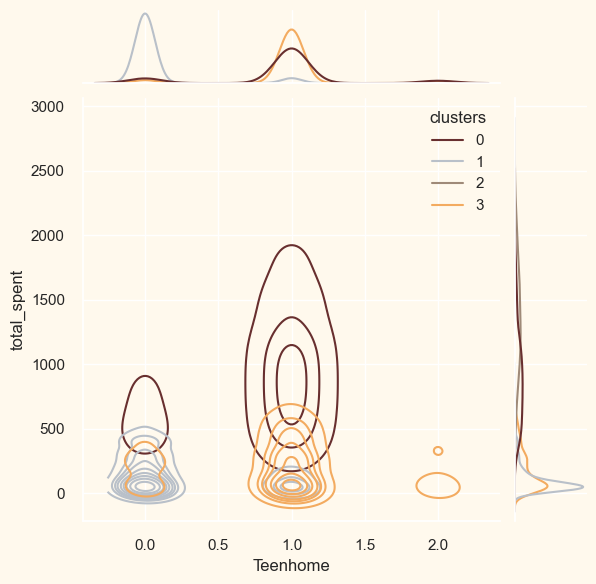

<Figure size 800x550 with 0 Axes>

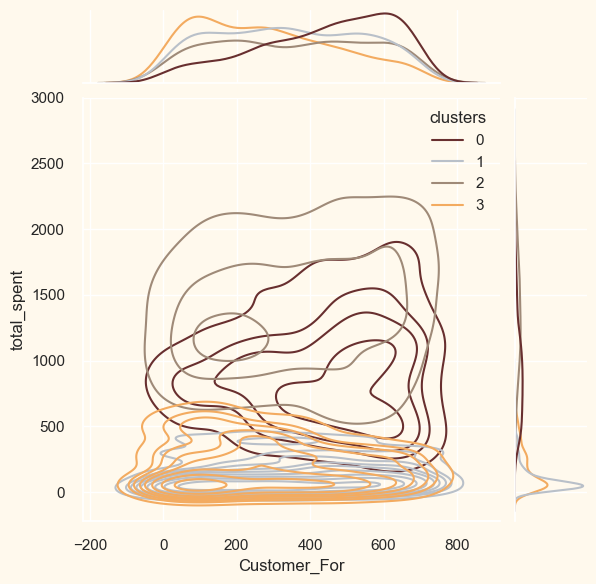

<Figure size 800x550 with 0 Axes>

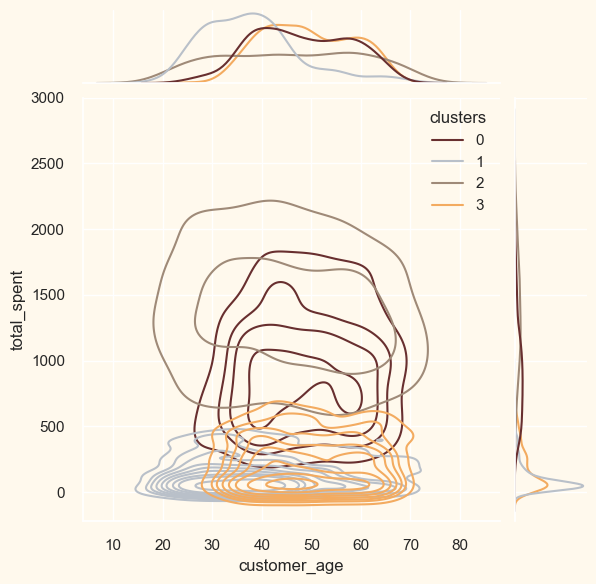

<Figure size 800x550 with 0 Axes>

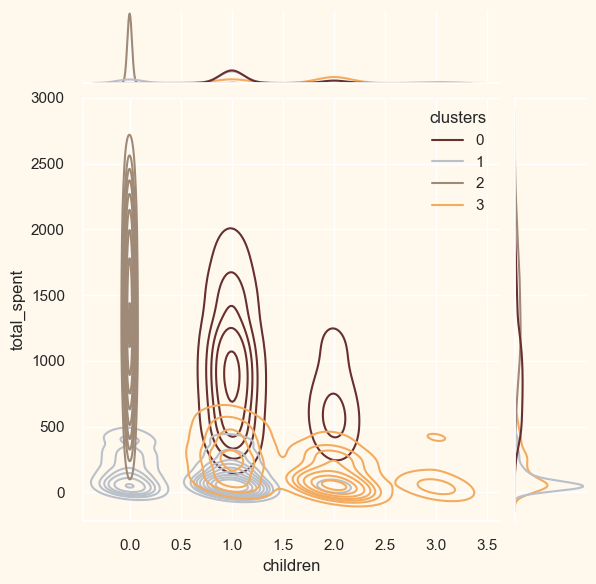

<Figure size 800x550 with 0 Axes>

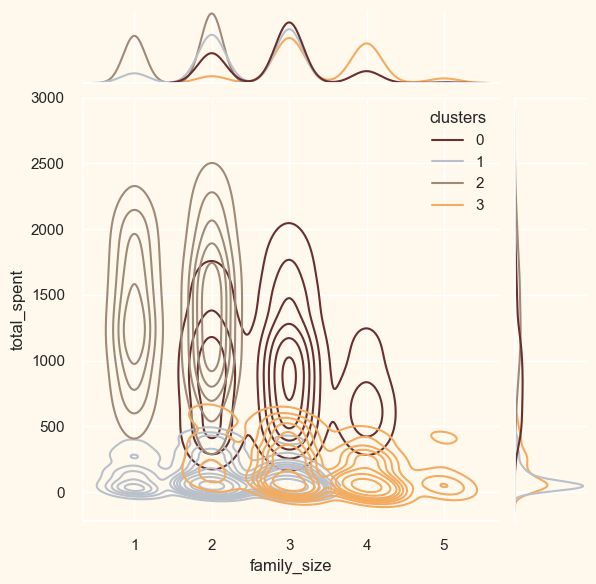

C:\Users\shefa\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:1883: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  func(x=self.x, ax=self.ax_marg_x, **kwargs)


<Figure size 800x550 with 0 Axes>

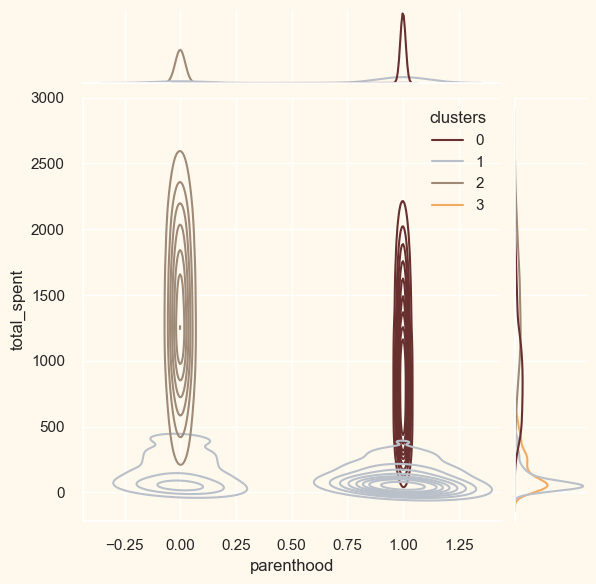

<Figure size 800x550 with 0 Axes>

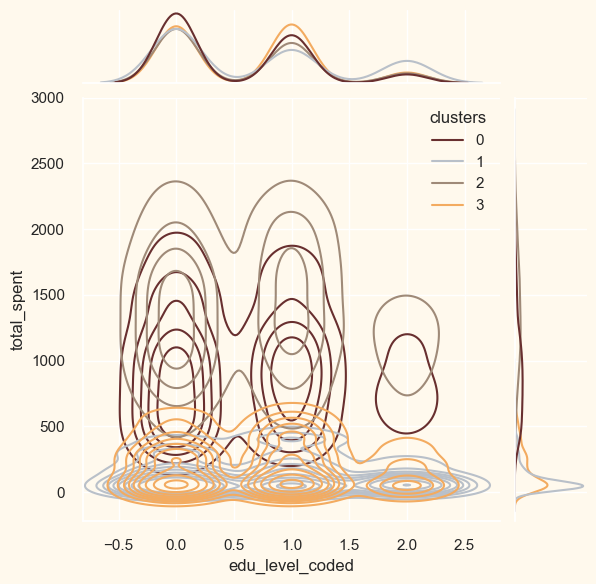

<Figure size 800x550 with 0 Axes>

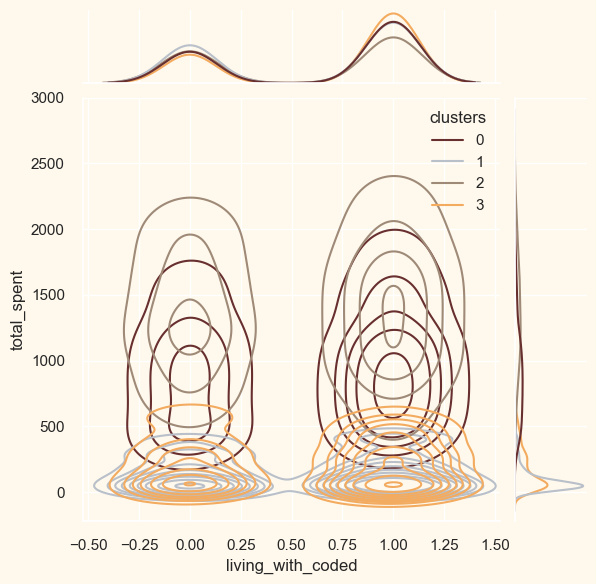

In [100]:
Personal = [ "Kidhome","Teenhome","Customer_For", "customer_age", "children", "family_size", "parenthood", "edu_level_coded","living_with_coded"]

for i in Personal:
    plt.figure()
    sns.jointplot(x=data[i], y=data["total_spent"], hue =data["clusters"], kind="kde", palette=pal)
    plt.show()

<h4>Deductions from the patterns observed above:</h4>